<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math

In [2]:
load_data = pd.read_excel("/content/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [4]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


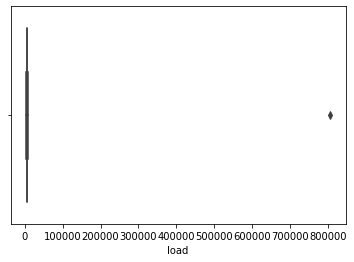

In [5]:
#outliers
sns.boxplot(x=data['load'])

In [6]:
from scipy import stats
z = np.abs(stats.zscore(load_data.iloc[:,0]))
threshold = 3
print(np.where(z > 3))

(array([928]),)


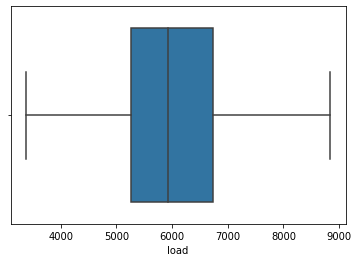

In [7]:
#replacing outliers
data.iloc[928,0] = data.iloc[927,0]
sns.boxplot(x=data['load'])

In [8]:
data_x = []
data_y = []
for i in range(0,len(data)-(24*7)):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+(24*7),0])

Text(0, 0.5, 'present hours load')

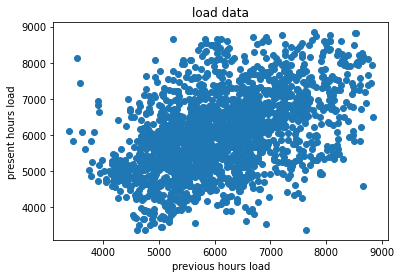

In [11]:
plt.scatter(data_x,data_y)
plt.title("load data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")

In [12]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3381.1930800000005
3377.9196
8841.66948
8841.66948


In [13]:
#Data Normalization
x = minmax_scale(data_x)
y = minmax_scale(data_y)
data_norm = []
for i in range(len(data)-24*7):
  data_norm.append([x[i],y[i]])
data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293377,0.322302
1,0.276021,0.286040
2,0.309820,0.254087
3,0.332401,0.300562
4,0.413902,0.404639
...,...,...
2010,0.499943,0.228524
2011,0.536940,0.217797
2012,0.622923,0.246298
2013,0.489837,0.324384


In [14]:
#Splitting Data
data_train,data_test = train_test_split(data_norm,test_size=0.1)
data_norm.head()

,0,1
0,0.293377,0.322302
1,0.276021,0.286040
2,0.309820,0.254087
3,0.332401,0.300562
4,0.413902,0.404639


In [15]:
data_x = np.array(data_train[0])
data_y = np.array(data_train[1])
len(data_x)

1813

In [16]:
# Training model
max_iters=2000
m=1.0
c=-1.0
Gm=0.0
Gc=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dc=0.0
iter=1
error=[]
while (iter<=max_iters):
  err=0.0
  for i in range(len(data_x)):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-c)**2
    Gm = Gm + (gm**2)
    Gc = Gc + (gc**2) 
    r1 = math.sqrt(Gm + exp)
    r2 = math.sqrt(Gc + exp)
    dm = -1*(alpha/r1)*gm
    dc = -1*(alpha/r2)*gc
    m = m + dm
    c = c + dc
  error.append(err/(2*len(data_x)))
  iter=iter+1

In [17]:
print(m,c)

0.52058562034344 0.22310319842063436


In [18]:
iters = np.arange(max_iters)
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)

In [19]:
mse_train = mean_squared_error(data_y,pred)

In [20]:
#mse
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.02957375779121843
Testing data mean squared error: 0.03408192150286519


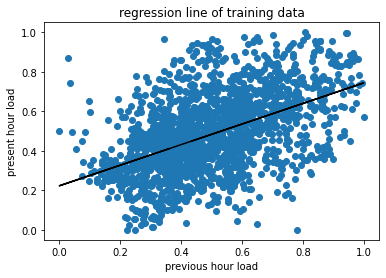

In [22]:
#Training data
plt.scatter(data_train[0],data_train[1])
plt.plot(data_train[0],pred,color='black')
plt.title("regression line of training data")
plt.xlabel("previous hour load")
plt.ylabel("present hour load")
plt.show()

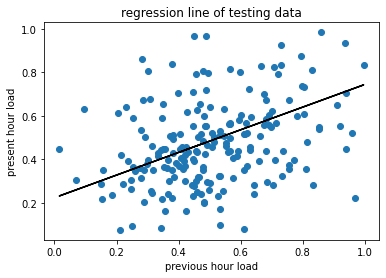

In [23]:
#Testing data
plt.scatter(data_test[0],data_test[1])
plt.plot(data_test[0],pred_test,color='black')
plt.title("regression line of testing data")
plt.xlabel("previous hour load")
plt.ylabel("present hour load")
plt.show()

In [25]:
load = float(input("enter load at this time : "))
load = (load - min_x)/(max_x-min_x)
o_load = load*m+c
output_load = o_load*(max_y-min_y)+min_y
print("predicted load :",o_load)

enter load at this time : 4444.4
predicted load : 0.32446619195021686
